<a href="https://colab.research.google.com/github/MilanM002005/FDS_PROJECTS/blob/main/TEAM9_CODING2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [23]:
from google.colab import files
upload = files.upload()

Saving water_potability.csv to water_potability (1).csv


In [24]:


df = pd.read_csv("water_potability.csv")
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [25]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [26]:

df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [27]:

df.isnull().sum()


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [28]:

df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


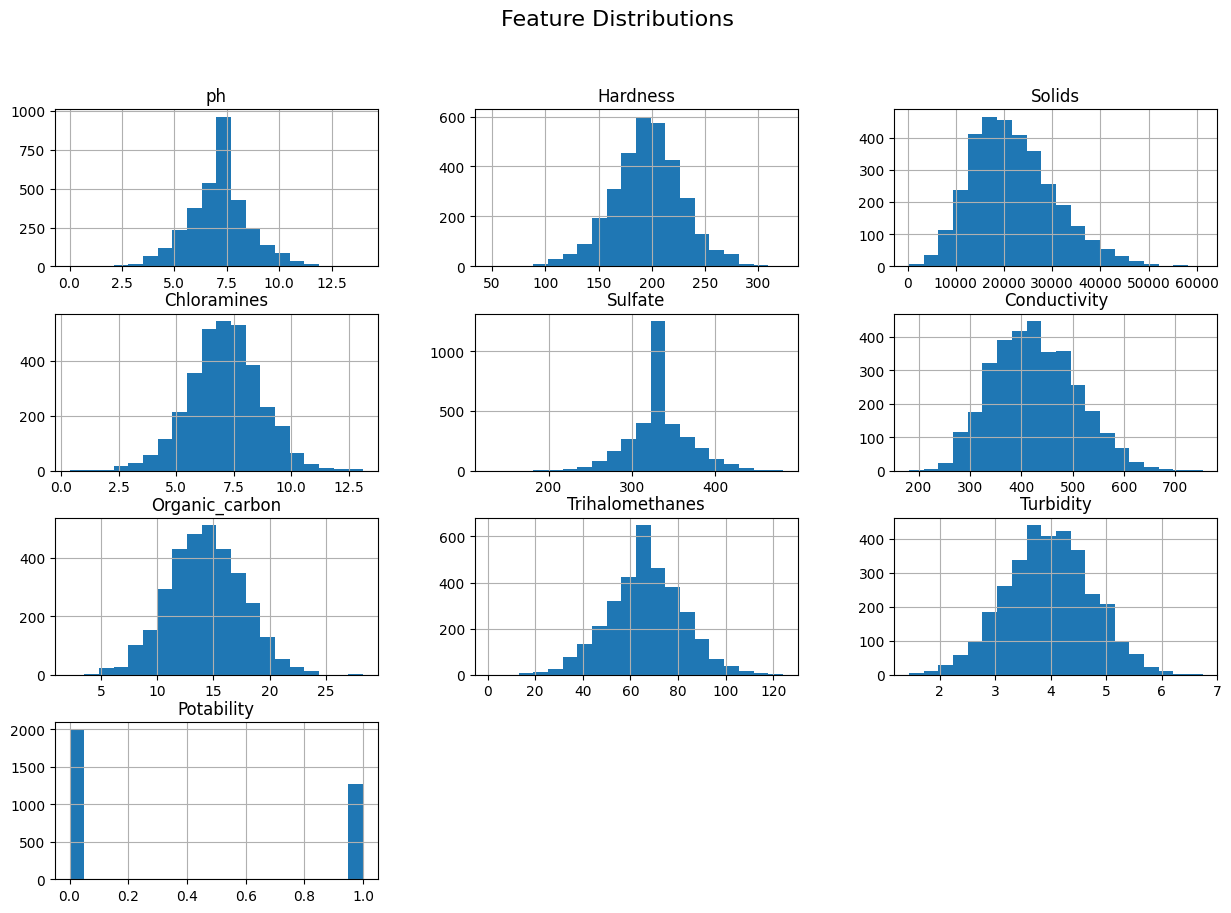

In [29]:

df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


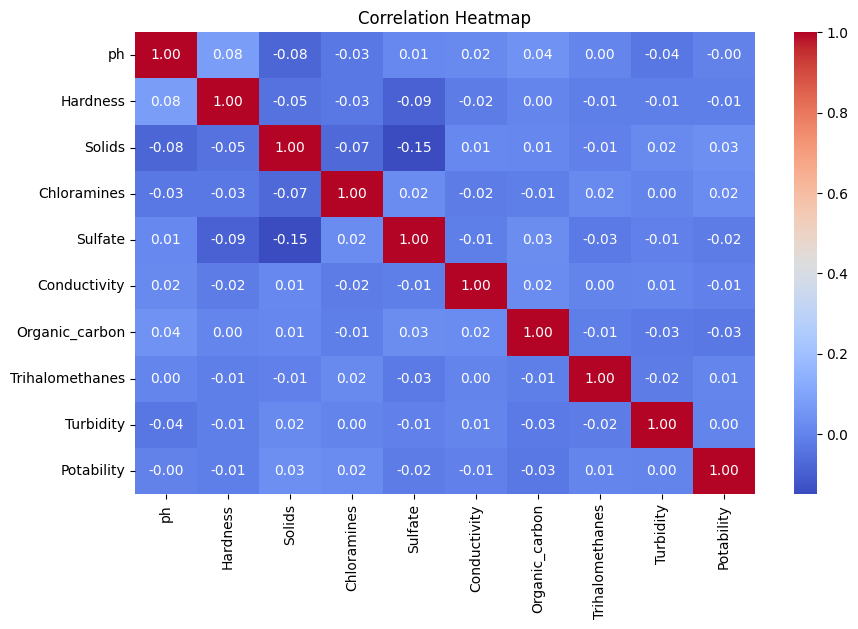

In [30]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


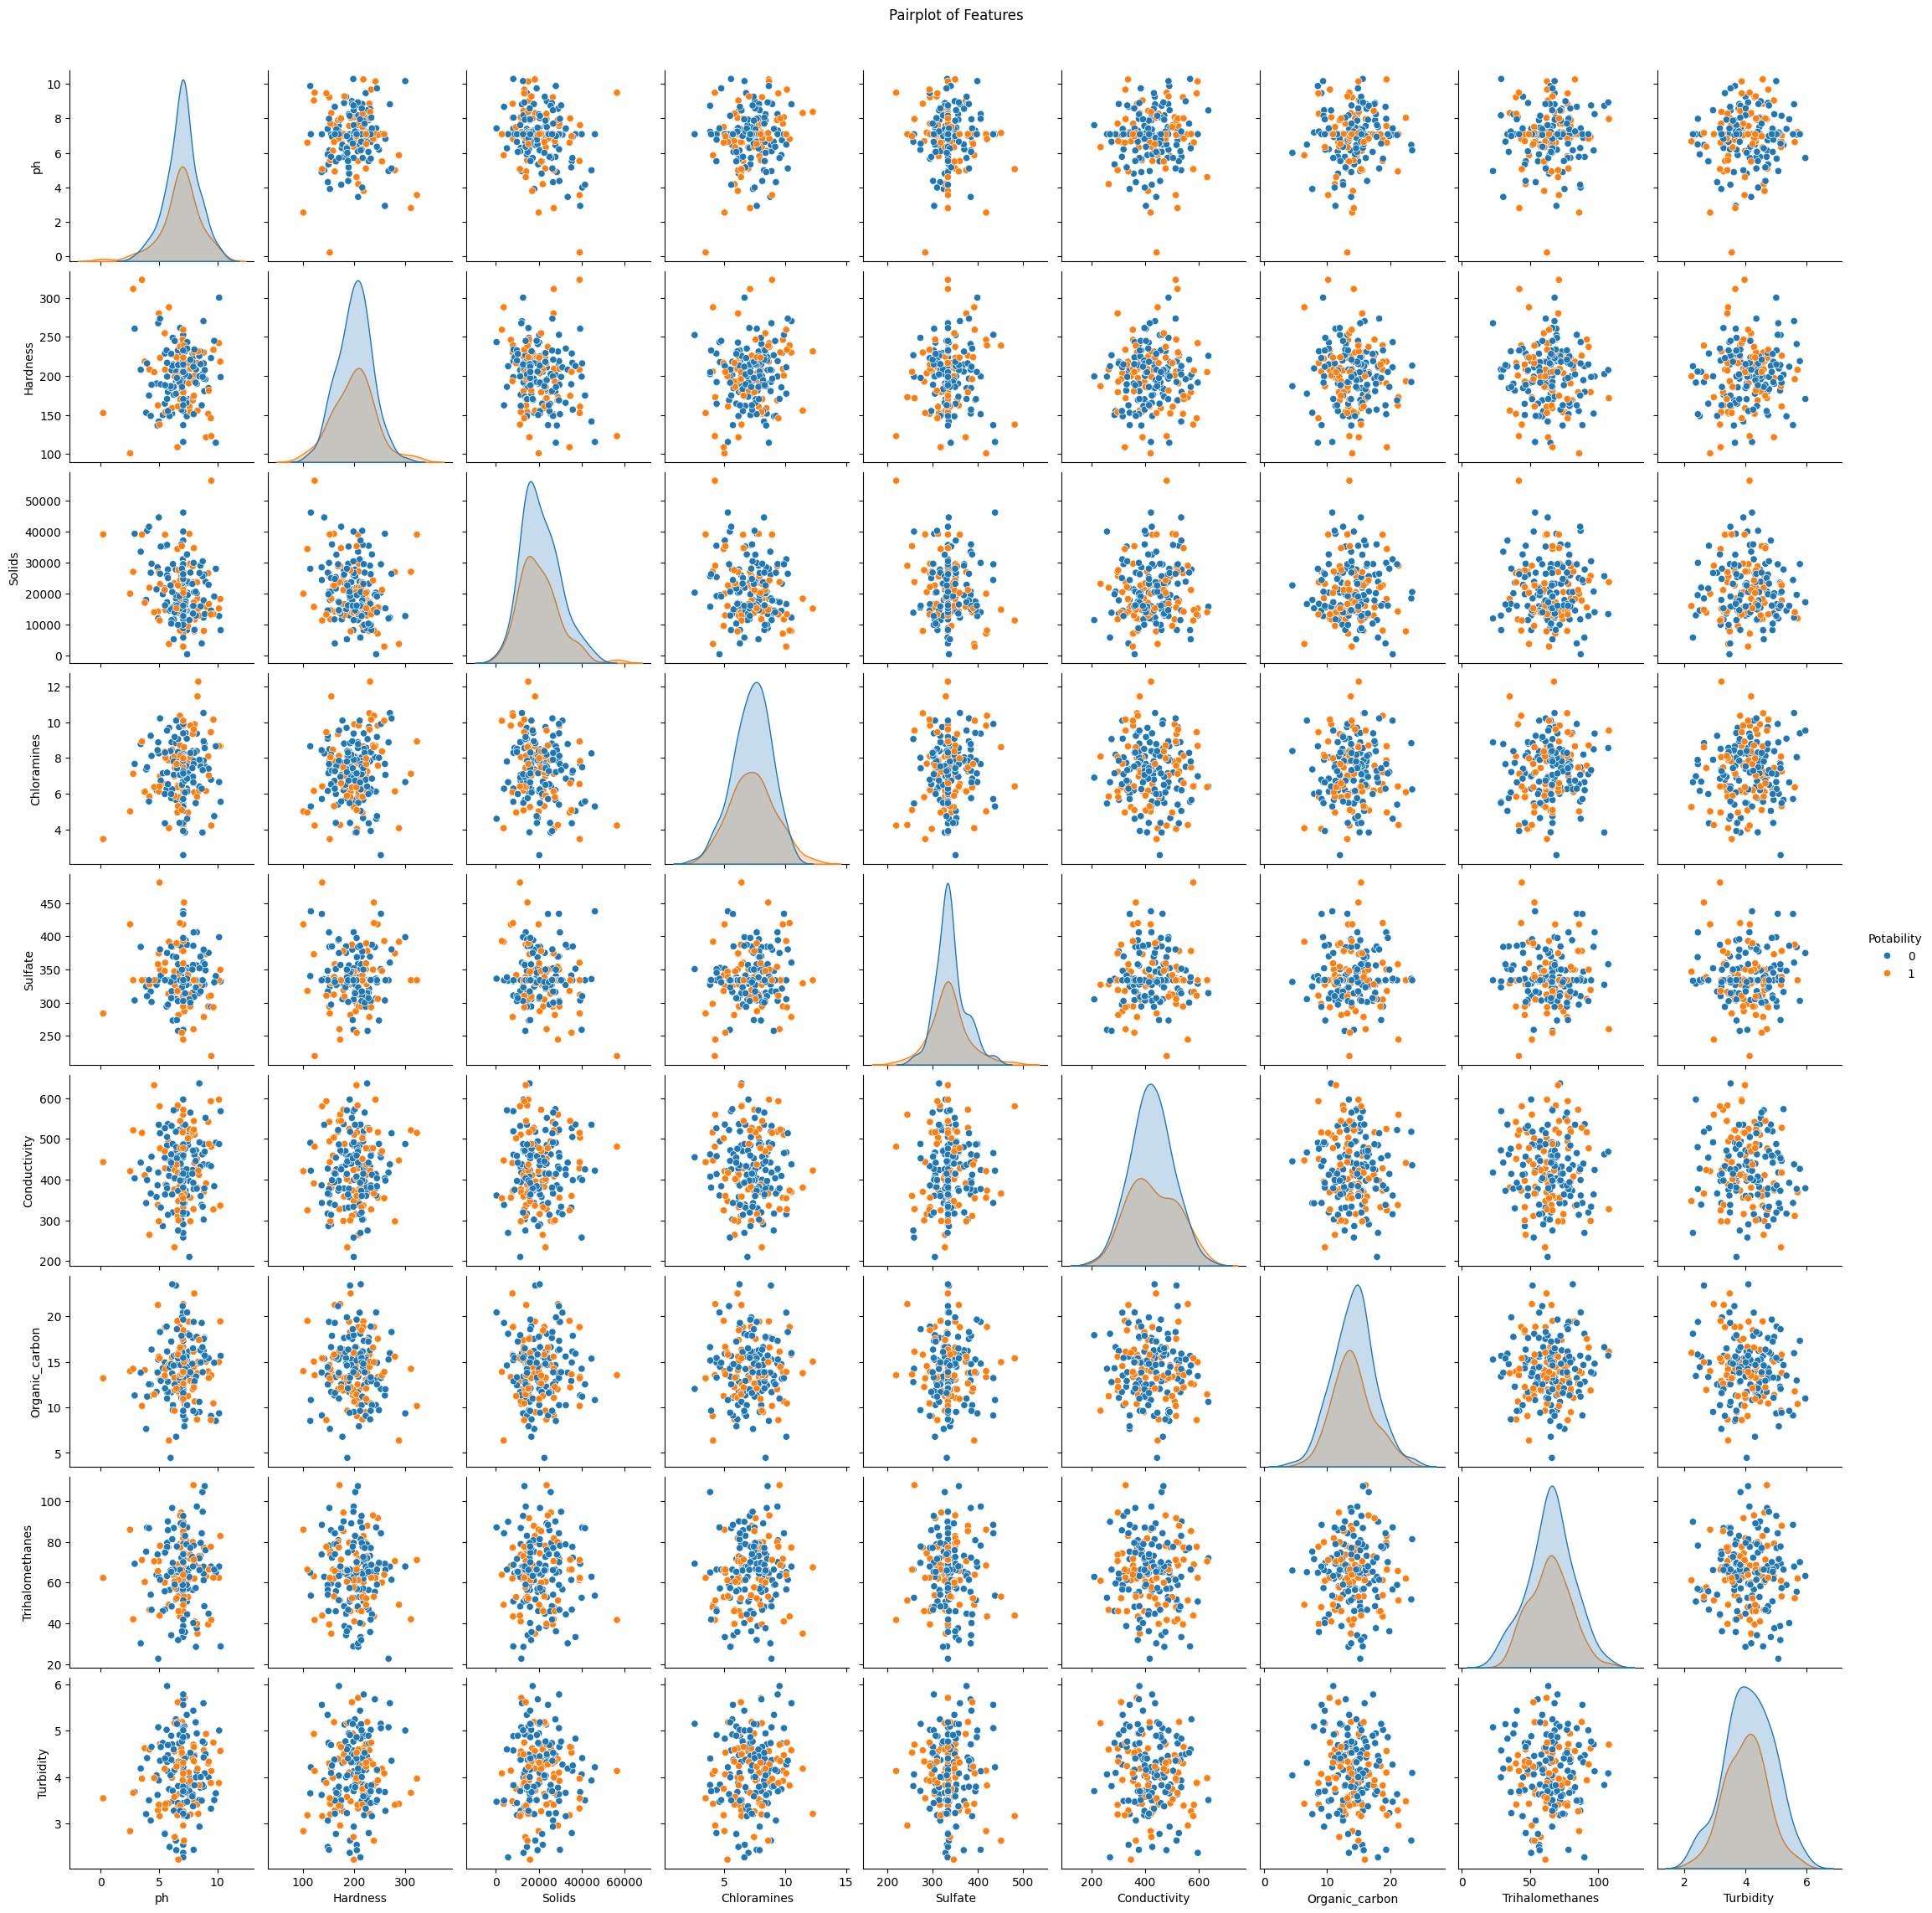

In [31]:

sns.pairplot(df.sample(200), hue='Potability')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


## Additional Data Visualizations

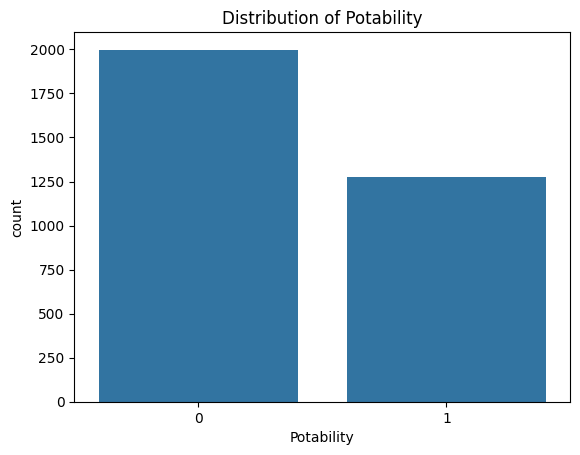

In [32]:

sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability')
plt.show()

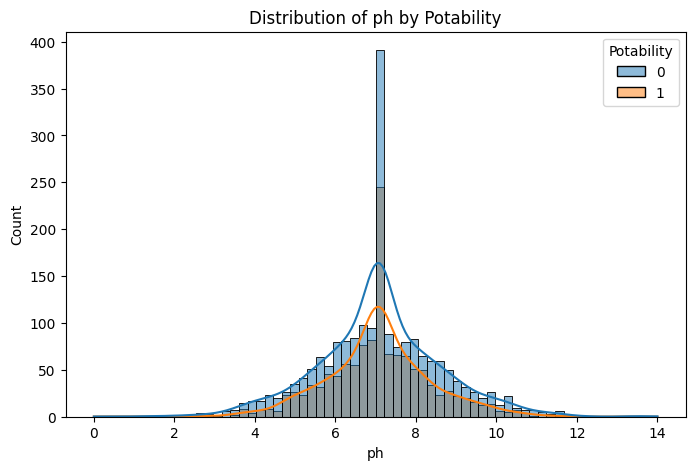

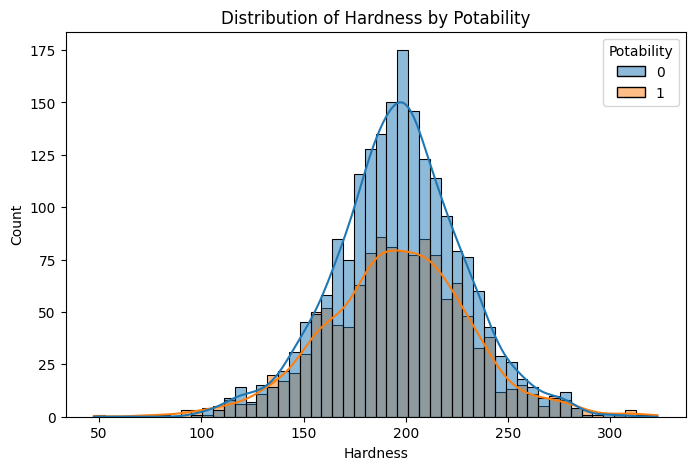

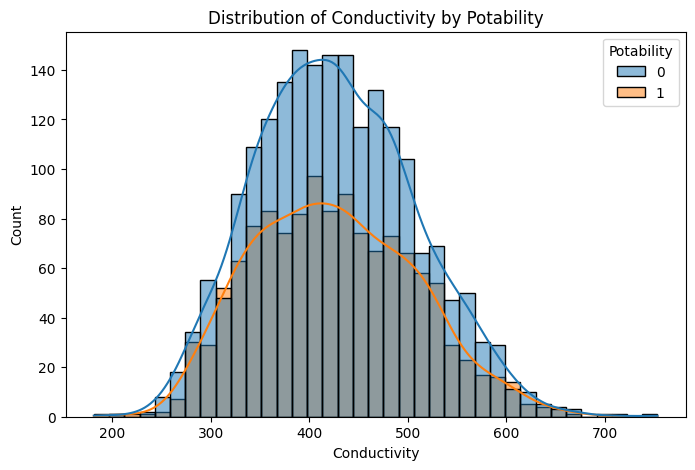

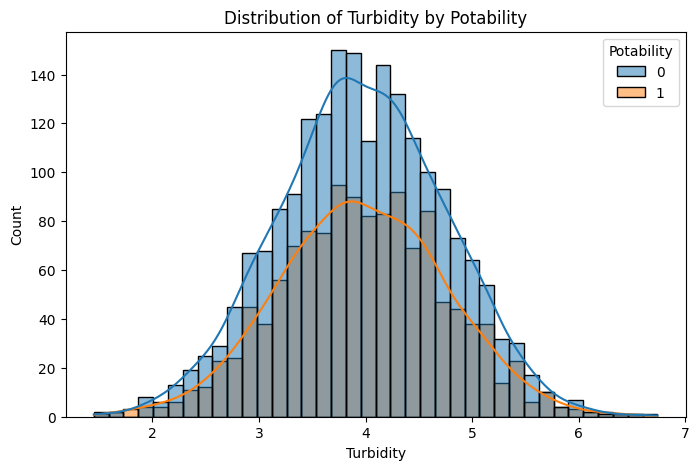

In [33]:
features = ['ph', 'Hardness', 'Conductivity',  'Turbidity']
for col in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Potability', kde=True)
    plt.title(f'Distribution of {col} by Potability')
    plt.show()

Decision Tree Accuracy: 0.6117886178861789


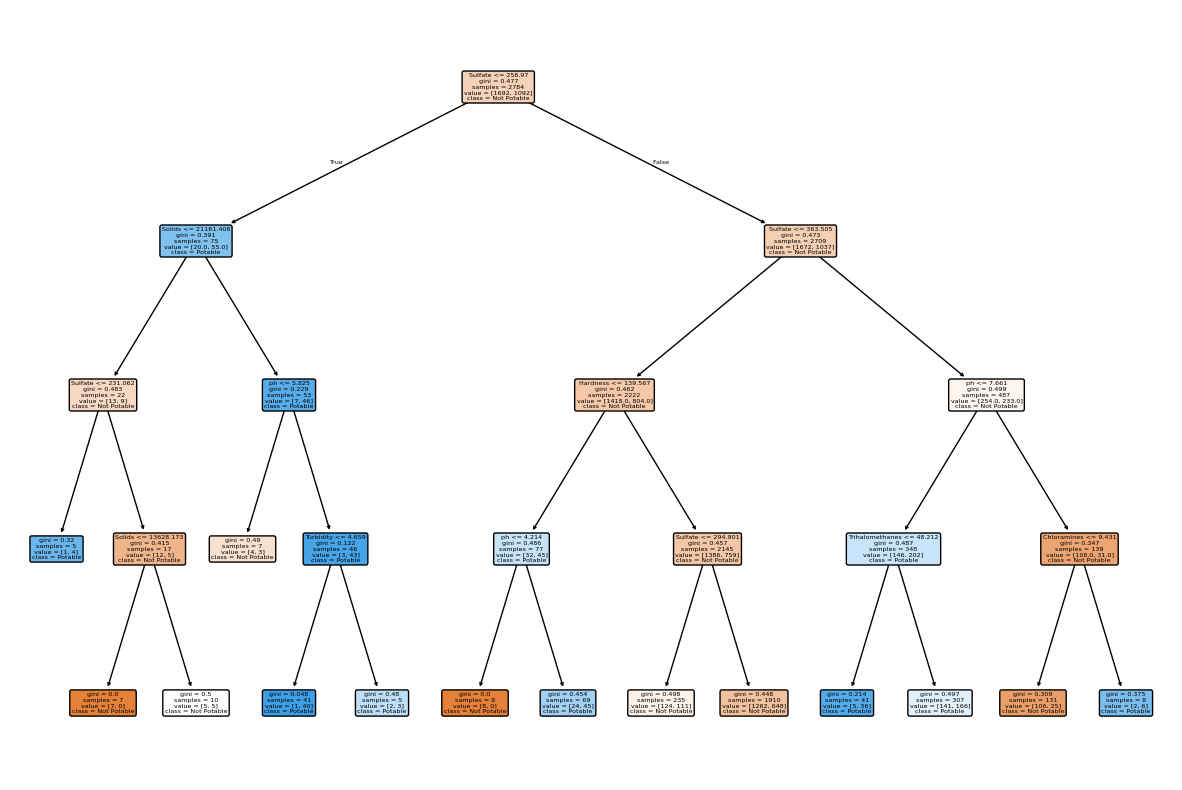

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)

dt = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Potable', 'Potable'], rounded=True)
plt.show()

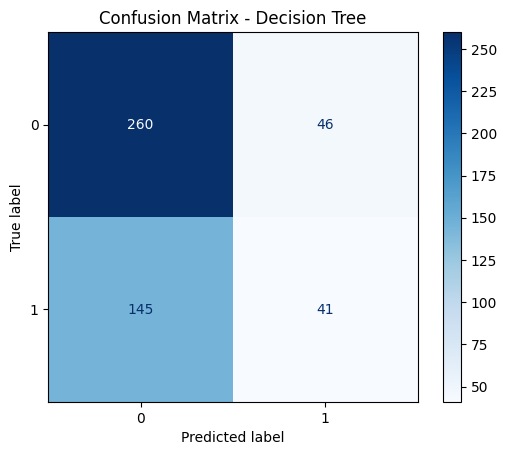

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

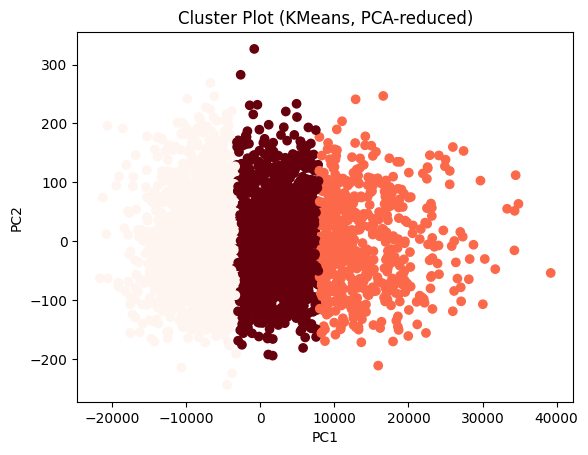

In [51]:
#SCATTER PLOT
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Reds')
plt.title("Cluster Plot (KMeans, PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


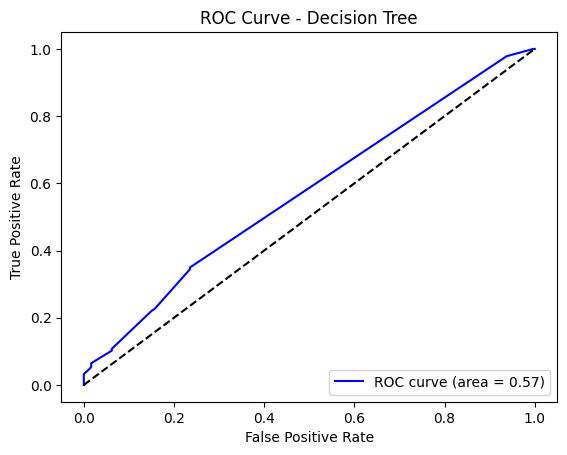

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
y_test_bin = label_binarize(y_test, classes=dt.classes_)
y_score = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_bin, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()